In [65]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import PIL
from PIL import Image
import os
import torchvision
from torchvision import transforms as tvt
import torch
from torch.nn import parallel
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import random
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import pathlib
import random

In [66]:
#dataDir='..'
dataType='train2014'
annFile='annotations/instances_{}.json'.format(dataType)
# initialize COCO api for instance annotations
coco=COCO(annFile)
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

loading annotations into memory...
Done (t=7.63s)
creating index...
index created!
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports food animal vehicle electronic person accessory indoor kitchen furniture appliance outdoor


In [68]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['airplane','bus','cat', 'dog', 'pizza']);
print(catIds)
imgIds = coco.getImgIds(catIds=5); #GET CAT IDS FOR GIVEN CLASS NAMES
#print(imgIds)
imgIds = coco.getImgIds(imgIds = [imgIds[2]])


[5, 6, 17, 18, 59]


In [22]:
catNms=['airplane','bus','cat', 'dog', 'pizza']
catIds = coco.getCatIds(catNms=catNms); #get a list category ids for each category name 
###Create training data set ###
for n, cat_id in enumerate(catIds): ##for each category id
    print('in category id:,',cat_id)
    imgIds = coco.getImgIds(catIds = cat_id) #for each category id, get a list of img ids
    print(imgIds[:10]) #printing first 10 image ids
    pathlib.Path('train_orig/' + catNms[n]).mkdir(parents=True, exist_ok=True) #create a path to store 
#     training data for the current category
    coco.download(tarDir = 'train_orig/' + catNms[n], imgIds = imgIds[0:1500]) #download first 1500 image ids 
#     into the specified directory
    d = os.listdir('train_orig/' + catNms[n]) #create list of files in the created directory. This list has 1500 
#     jpg file names
#     print('list of files in d', d)
    for img in d: #iterate through list of downloaded images. Resize them to 64 x 64. 
        temp_img = Image.open('train/' + catNms[n] + '/' + img) #open image
        temp_img = temp_img.resize((64,64)) #resize
        temp_img.save(fp = 'train/' + catNms[n] + '/' + img) #overwrite image with the 64 x 64 version
        ## save function parameters:
#         fp – A filename (string), pathlib.Path object or file object.
#         format – Optional format override. If omitted, the format to use is determined from the 
#         ##filename extension.
#         If a file object was used instead of a filename, this parameter should always be used.

    

    
   

in category id:, 5
[221184, 393221, 376838, 352264, 24585, 253965, 57362, 32787, 540695, 237592]
downloaded 0/1500 images (t=0.3s)
downloaded 1/1500 images (t=0.2s)
downloaded 2/1500 images (t=0.2s)
downloaded 3/1500 images (t=0.3s)
downloaded 4/1500 images (t=0.2s)
downloaded 5/1500 images (t=0.2s)
downloaded 6/1500 images (t=0.2s)
downloaded 7/1500 images (t=0.2s)
downloaded 8/1500 images (t=0.2s)
downloaded 9/1500 images (t=0.3s)
downloaded 10/1500 images (t=0.2s)
downloaded 11/1500 images (t=0.2s)
downloaded 12/1500 images (t=0.3s)
downloaded 13/1500 images (t=0.2s)
downloaded 14/1500 images (t=0.2s)
downloaded 15/1500 images (t=0.3s)
downloaded 16/1500 images (t=0.2s)
downloaded 17/1500 images (t=0.3s)
downloaded 18/1500 images (t=0.2s)
downloaded 19/1500 images (t=0.2s)
downloaded 20/1500 images (t=0.2s)
downloaded 21/1500 images (t=0.2s)
downloaded 22/1500 images (t=0.3s)
downloaded 23/1500 images (t=0.2s)
downloaded 24/1500 images (t=0.2s)
downloaded 25/1500 images (t=0.2s)
dow

downloaded 228/1500 images (t=0.2s)
downloaded 229/1500 images (t=0.2s)
downloaded 230/1500 images (t=0.2s)
downloaded 231/1500 images (t=0.3s)
downloaded 232/1500 images (t=0.2s)
downloaded 233/1500 images (t=0.2s)
downloaded 234/1500 images (t=0.3s)
downloaded 235/1500 images (t=0.2s)
downloaded 236/1500 images (t=0.2s)
downloaded 237/1500 images (t=0.2s)
downloaded 238/1500 images (t=0.3s)
downloaded 239/1500 images (t=0.2s)
downloaded 240/1500 images (t=0.2s)
downloaded 241/1500 images (t=0.2s)
downloaded 242/1500 images (t=0.2s)
downloaded 243/1500 images (t=0.1s)
downloaded 244/1500 images (t=0.2s)
downloaded 245/1500 images (t=0.2s)
downloaded 246/1500 images (t=0.3s)
downloaded 247/1500 images (t=0.2s)
downloaded 248/1500 images (t=0.2s)
downloaded 249/1500 images (t=0.2s)
downloaded 250/1500 images (t=0.2s)
downloaded 251/1500 images (t=0.2s)
downloaded 252/1500 images (t=0.2s)
downloaded 253/1500 images (t=0.2s)
downloaded 254/1500 images (t=0.2s)
downloaded 255/1500 images (

downloaded 456/1500 images (t=0.2s)
downloaded 457/1500 images (t=0.2s)
downloaded 458/1500 images (t=0.2s)
downloaded 459/1500 images (t=0.2s)
downloaded 460/1500 images (t=0.2s)
downloaded 461/1500 images (t=0.2s)
downloaded 462/1500 images (t=0.2s)
downloaded 463/1500 images (t=0.2s)
downloaded 464/1500 images (t=0.2s)
downloaded 465/1500 images (t=0.2s)
downloaded 466/1500 images (t=0.2s)
downloaded 467/1500 images (t=0.2s)
downloaded 468/1500 images (t=0.2s)
downloaded 469/1500 images (t=0.2s)
downloaded 470/1500 images (t=0.2s)
downloaded 471/1500 images (t=0.2s)
downloaded 472/1500 images (t=0.2s)
downloaded 473/1500 images (t=0.2s)
downloaded 474/1500 images (t=0.2s)
downloaded 475/1500 images (t=0.2s)
downloaded 476/1500 images (t=0.2s)
downloaded 477/1500 images (t=0.2s)
downloaded 478/1500 images (t=0.3s)
downloaded 479/1500 images (t=0.2s)
downloaded 480/1500 images (t=0.2s)
downloaded 481/1500 images (t=0.2s)
downloaded 482/1500 images (t=0.2s)
downloaded 483/1500 images (

downloaded 684/1500 images (t=0.2s)
downloaded 685/1500 images (t=0.2s)
downloaded 686/1500 images (t=0.2s)
downloaded 687/1500 images (t=0.2s)
downloaded 688/1500 images (t=0.2s)
downloaded 689/1500 images (t=0.2s)
downloaded 690/1500 images (t=0.2s)
downloaded 691/1500 images (t=0.2s)
downloaded 692/1500 images (t=0.2s)
downloaded 693/1500 images (t=0.2s)
downloaded 694/1500 images (t=0.2s)
downloaded 695/1500 images (t=0.2s)
downloaded 696/1500 images (t=0.2s)
downloaded 697/1500 images (t=0.2s)
downloaded 698/1500 images (t=0.2s)
downloaded 699/1500 images (t=0.2s)
downloaded 700/1500 images (t=0.2s)
downloaded 701/1500 images (t=0.2s)
downloaded 702/1500 images (t=0.2s)
downloaded 703/1500 images (t=0.2s)
downloaded 704/1500 images (t=0.2s)
downloaded 705/1500 images (t=0.2s)
downloaded 706/1500 images (t=0.2s)
downloaded 707/1500 images (t=0.4s)
downloaded 708/1500 images (t=0.2s)
downloaded 709/1500 images (t=0.2s)
downloaded 710/1500 images (t=0.3s)
downloaded 711/1500 images (

downloaded 913/1500 images (t=0.2s)
downloaded 914/1500 images (t=0.2s)
downloaded 915/1500 images (t=0.2s)
downloaded 916/1500 images (t=0.2s)
downloaded 917/1500 images (t=0.2s)
downloaded 918/1500 images (t=0.2s)
downloaded 919/1500 images (t=0.2s)
downloaded 920/1500 images (t=0.2s)
downloaded 921/1500 images (t=0.2s)
downloaded 922/1500 images (t=0.2s)
downloaded 923/1500 images (t=0.2s)
downloaded 924/1500 images (t=0.2s)
downloaded 925/1500 images (t=0.3s)
downloaded 926/1500 images (t=0.2s)
downloaded 927/1500 images (t=0.3s)
downloaded 928/1500 images (t=0.2s)
downloaded 929/1500 images (t=0.3s)
downloaded 930/1500 images (t=0.2s)
downloaded 931/1500 images (t=0.1s)
downloaded 932/1500 images (t=0.2s)
downloaded 933/1500 images (t=0.2s)
downloaded 934/1500 images (t=0.2s)
downloaded 935/1500 images (t=0.2s)
downloaded 936/1500 images (t=0.2s)
downloaded 937/1500 images (t=0.4s)
downloaded 938/1500 images (t=0.2s)
downloaded 939/1500 images (t=0.2s)
downloaded 940/1500 images (

downloaded 1137/1500 images (t=0.2s)
downloaded 1138/1500 images (t=0.2s)
downloaded 1139/1500 images (t=0.2s)
downloaded 1140/1500 images (t=0.2s)
downloaded 1141/1500 images (t=0.2s)
downloaded 1142/1500 images (t=0.2s)
downloaded 1143/1500 images (t=0.2s)
downloaded 1144/1500 images (t=0.2s)
downloaded 1145/1500 images (t=0.3s)
downloaded 1146/1500 images (t=0.2s)
downloaded 1147/1500 images (t=0.2s)
downloaded 1148/1500 images (t=0.2s)
downloaded 1149/1500 images (t=0.2s)
downloaded 1150/1500 images (t=0.2s)
downloaded 1151/1500 images (t=0.2s)
downloaded 1152/1500 images (t=0.2s)
downloaded 1153/1500 images (t=0.2s)
downloaded 1154/1500 images (t=0.2s)
downloaded 1155/1500 images (t=0.2s)
downloaded 1156/1500 images (t=0.2s)
downloaded 1157/1500 images (t=0.2s)
downloaded 1158/1500 images (t=0.2s)
downloaded 1159/1500 images (t=0.2s)
downloaded 1160/1500 images (t=0.2s)
downloaded 1161/1500 images (t=0.2s)
downloaded 1162/1500 images (t=0.2s)
downloaded 1163/1500 images (t=0.2s)
d

downloaded 1359/1500 images (t=0.2s)
downloaded 1360/1500 images (t=0.2s)
downloaded 1361/1500 images (t=0.3s)
downloaded 1362/1500 images (t=0.2s)
downloaded 1363/1500 images (t=0.2s)
downloaded 1364/1500 images (t=0.2s)
downloaded 1365/1500 images (t=0.1s)
downloaded 1366/1500 images (t=0.2s)
downloaded 1367/1500 images (t=0.3s)
downloaded 1368/1500 images (t=0.2s)
downloaded 1369/1500 images (t=0.4s)
downloaded 1370/1500 images (t=0.1s)
downloaded 1371/1500 images (t=0.2s)
downloaded 1372/1500 images (t=0.1s)
downloaded 1373/1500 images (t=0.2s)
downloaded 1374/1500 images (t=0.2s)
downloaded 1375/1500 images (t=0.1s)
downloaded 1376/1500 images (t=0.2s)
downloaded 1377/1500 images (t=0.3s)
downloaded 1378/1500 images (t=0.2s)
downloaded 1379/1500 images (t=0.2s)
downloaded 1380/1500 images (t=0.3s)
downloaded 1381/1500 images (t=0.2s)
downloaded 1382/1500 images (t=0.3s)
downloaded 1383/1500 images (t=0.2s)
downloaded 1384/1500 images (t=0.2s)
downloaded 1385/1500 images (t=0.2s)
d

downloaded 0/1500 images (t=0.2s)
downloaded 1/1500 images (t=0.2s)
downloaded 2/1500 images (t=0.2s)
downloaded 3/1500 images (t=0.3s)
downloaded 4/1500 images (t=0.2s)
downloaded 5/1500 images (t=0.2s)
downloaded 6/1500 images (t=0.2s)
downloaded 7/1500 images (t=0.2s)
downloaded 8/1500 images (t=0.2s)
downloaded 9/1500 images (t=0.2s)
downloaded 10/1500 images (t=0.2s)
downloaded 11/1500 images (t=0.3s)
downloaded 12/1500 images (t=0.2s)
downloaded 13/1500 images (t=0.2s)
downloaded 14/1500 images (t=0.1s)
downloaded 15/1500 images (t=0.2s)
downloaded 16/1500 images (t=0.2s)
downloaded 17/1500 images (t=0.2s)
downloaded 18/1500 images (t=0.2s)
downloaded 19/1500 images (t=0.4s)
downloaded 20/1500 images (t=0.3s)
downloaded 21/1500 images (t=0.2s)
downloaded 22/1500 images (t=0.2s)
downloaded 23/1500 images (t=0.2s)
downloaded 24/1500 images (t=0.2s)
downloaded 25/1500 images (t=0.2s)
downloaded 26/1500 images (t=0.3s)
downloaded 27/1500 images (t=0.2s)
downloaded 28/1500 images (t=0

downloaded 231/1500 images (t=0.2s)
downloaded 232/1500 images (t=0.2s)
downloaded 233/1500 images (t=0.2s)
downloaded 234/1500 images (t=0.2s)
downloaded 235/1500 images (t=0.2s)
downloaded 236/1500 images (t=0.3s)
downloaded 237/1500 images (t=0.3s)
downloaded 238/1500 images (t=0.2s)
downloaded 239/1500 images (t=0.2s)
downloaded 240/1500 images (t=0.2s)
downloaded 241/1500 images (t=0.2s)
downloaded 242/1500 images (t=0.2s)
downloaded 243/1500 images (t=0.3s)
downloaded 244/1500 images (t=0.2s)
downloaded 245/1500 images (t=0.2s)
downloaded 246/1500 images (t=0.2s)
downloaded 247/1500 images (t=0.2s)
downloaded 248/1500 images (t=0.2s)
downloaded 249/1500 images (t=0.2s)
downloaded 250/1500 images (t=0.3s)
downloaded 251/1500 images (t=0.2s)
downloaded 252/1500 images (t=0.3s)
downloaded 253/1500 images (t=0.2s)
downloaded 254/1500 images (t=0.3s)
downloaded 255/1500 images (t=0.2s)
downloaded 256/1500 images (t=0.2s)
downloaded 257/1500 images (t=0.2s)
downloaded 258/1500 images (

downloaded 459/1500 images (t=0.2s)
downloaded 460/1500 images (t=0.2s)
downloaded 461/1500 images (t=0.2s)
downloaded 462/1500 images (t=0.2s)
downloaded 463/1500 images (t=0.2s)
downloaded 464/1500 images (t=0.3s)
downloaded 465/1500 images (t=0.3s)
downloaded 466/1500 images (t=0.3s)
downloaded 467/1500 images (t=0.2s)
downloaded 468/1500 images (t=0.3s)
downloaded 469/1500 images (t=0.2s)
downloaded 470/1500 images (t=0.3s)
downloaded 471/1500 images (t=0.3s)
downloaded 472/1500 images (t=0.2s)
downloaded 473/1500 images (t=0.3s)
downloaded 474/1500 images (t=0.2s)
downloaded 475/1500 images (t=0.3s)
downloaded 476/1500 images (t=0.2s)
downloaded 477/1500 images (t=0.2s)
downloaded 478/1500 images (t=0.3s)
downloaded 479/1500 images (t=0.3s)
downloaded 480/1500 images (t=0.3s)
downloaded 481/1500 images (t=0.3s)
downloaded 482/1500 images (t=0.3s)
downloaded 483/1500 images (t=0.2s)
downloaded 484/1500 images (t=0.3s)
downloaded 485/1500 images (t=0.2s)
downloaded 486/1500 images (

downloaded 687/1500 images (t=0.2s)
downloaded 688/1500 images (t=0.2s)
downloaded 689/1500 images (t=0.2s)
downloaded 690/1500 images (t=0.2s)
downloaded 691/1500 images (t=0.2s)
downloaded 692/1500 images (t=0.2s)
downloaded 693/1500 images (t=0.3s)
downloaded 694/1500 images (t=0.2s)
downloaded 695/1500 images (t=0.2s)
downloaded 696/1500 images (t=0.2s)
downloaded 697/1500 images (t=0.2s)
downloaded 698/1500 images (t=0.2s)
downloaded 699/1500 images (t=0.2s)
downloaded 700/1500 images (t=0.2s)
downloaded 701/1500 images (t=0.2s)
downloaded 702/1500 images (t=0.2s)
downloaded 703/1500 images (t=0.3s)
downloaded 704/1500 images (t=0.2s)
downloaded 705/1500 images (t=0.2s)
downloaded 706/1500 images (t=0.2s)
downloaded 707/1500 images (t=0.2s)
downloaded 708/1500 images (t=0.2s)
downloaded 709/1500 images (t=0.2s)
downloaded 710/1500 images (t=0.2s)
downloaded 711/1500 images (t=0.2s)
downloaded 712/1500 images (t=0.3s)
downloaded 713/1500 images (t=0.2s)
downloaded 714/1500 images (

downloaded 915/1500 images (t=0.2s)
downloaded 916/1500 images (t=0.2s)
downloaded 917/1500 images (t=0.2s)
downloaded 918/1500 images (t=0.2s)
downloaded 919/1500 images (t=0.2s)
downloaded 920/1500 images (t=0.3s)
downloaded 921/1500 images (t=0.2s)
downloaded 922/1500 images (t=0.3s)
downloaded 923/1500 images (t=0.2s)
downloaded 924/1500 images (t=0.3s)
downloaded 925/1500 images (t=0.2s)
downloaded 926/1500 images (t=0.2s)
downloaded 927/1500 images (t=0.3s)
downloaded 928/1500 images (t=0.2s)
downloaded 929/1500 images (t=0.3s)
downloaded 930/1500 images (t=0.3s)
downloaded 931/1500 images (t=0.2s)
downloaded 932/1500 images (t=0.3s)
downloaded 933/1500 images (t=0.3s)
downloaded 934/1500 images (t=0.3s)
downloaded 935/1500 images (t=0.2s)
downloaded 936/1500 images (t=0.3s)
downloaded 937/1500 images (t=0.3s)
downloaded 938/1500 images (t=0.3s)
downloaded 939/1500 images (t=0.3s)
downloaded 940/1500 images (t=0.2s)
downloaded 941/1500 images (t=0.3s)
downloaded 942/1500 images (

downloaded 1139/1500 images (t=0.3s)
downloaded 1140/1500 images (t=0.2s)
downloaded 1141/1500 images (t=0.2s)
downloaded 1142/1500 images (t=0.2s)
downloaded 1143/1500 images (t=0.3s)
downloaded 1144/1500 images (t=0.2s)
downloaded 1145/1500 images (t=0.3s)
downloaded 1146/1500 images (t=0.3s)
downloaded 1147/1500 images (t=0.2s)
downloaded 1148/1500 images (t=0.3s)
downloaded 1149/1500 images (t=0.2s)
downloaded 1150/1500 images (t=0.2s)
downloaded 1151/1500 images (t=0.2s)
downloaded 1152/1500 images (t=0.3s)
downloaded 1153/1500 images (t=0.2s)
downloaded 1154/1500 images (t=0.2s)
downloaded 1155/1500 images (t=0.2s)
downloaded 1156/1500 images (t=0.2s)
downloaded 1157/1500 images (t=0.2s)
downloaded 1158/1500 images (t=0.2s)
downloaded 1159/1500 images (t=0.2s)
downloaded 1160/1500 images (t=0.2s)
downloaded 1161/1500 images (t=0.2s)
downloaded 1162/1500 images (t=0.3s)
downloaded 1163/1500 images (t=0.3s)
downloaded 1164/1500 images (t=0.3s)
downloaded 1165/1500 images (t=0.2s)
d

downloaded 1361/1500 images (t=0.2s)
downloaded 1362/1500 images (t=0.3s)
downloaded 1363/1500 images (t=0.2s)
downloaded 1364/1500 images (t=0.2s)
downloaded 1365/1500 images (t=0.2s)
downloaded 1366/1500 images (t=0.2s)
downloaded 1367/1500 images (t=0.3s)
downloaded 1368/1500 images (t=0.2s)
downloaded 1369/1500 images (t=0.2s)
downloaded 1370/1500 images (t=0.2s)
downloaded 1371/1500 images (t=0.3s)
downloaded 1372/1500 images (t=0.2s)
downloaded 1373/1500 images (t=0.3s)
downloaded 1374/1500 images (t=0.2s)
downloaded 1375/1500 images (t=0.2s)
downloaded 1376/1500 images (t=0.2s)
downloaded 1377/1500 images (t=0.2s)
downloaded 1378/1500 images (t=0.3s)
downloaded 1379/1500 images (t=0.2s)
downloaded 1380/1500 images (t=0.2s)
downloaded 1381/1500 images (t=0.2s)
downloaded 1382/1500 images (t=0.2s)
downloaded 1383/1500 images (t=0.2s)
downloaded 1384/1500 images (t=0.2s)
downloaded 1385/1500 images (t=0.2s)
downloaded 1386/1500 images (t=0.2s)
downloaded 1387/1500 images (t=0.2s)
d

downloaded 0/1500 images (t=0.2s)
downloaded 1/1500 images (t=0.3s)
downloaded 2/1500 images (t=0.2s)
downloaded 3/1500 images (t=0.2s)
downloaded 4/1500 images (t=0.3s)
downloaded 5/1500 images (t=0.2s)
downloaded 6/1500 images (t=0.2s)
downloaded 7/1500 images (t=0.2s)
downloaded 8/1500 images (t=0.2s)
downloaded 9/1500 images (t=0.2s)
downloaded 10/1500 images (t=0.2s)
downloaded 11/1500 images (t=0.2s)
downloaded 12/1500 images (t=0.2s)
downloaded 13/1500 images (t=0.2s)
downloaded 14/1500 images (t=0.3s)
downloaded 15/1500 images (t=0.2s)
downloaded 16/1500 images (t=0.2s)
downloaded 17/1500 images (t=0.2s)
downloaded 18/1500 images (t=0.2s)
downloaded 19/1500 images (t=0.2s)
downloaded 20/1500 images (t=0.2s)
downloaded 21/1500 images (t=0.2s)
downloaded 22/1500 images (t=0.2s)
downloaded 23/1500 images (t=0.2s)
downloaded 24/1500 images (t=0.2s)
downloaded 25/1500 images (t=0.2s)
downloaded 26/1500 images (t=0.2s)
downloaded 27/1500 images (t=0.2s)
downloaded 28/1500 images (t=0

downloaded 231/1500 images (t=0.2s)
downloaded 232/1500 images (t=0.2s)
downloaded 233/1500 images (t=0.2s)
downloaded 234/1500 images (t=0.2s)
downloaded 235/1500 images (t=0.2s)
downloaded 236/1500 images (t=0.2s)
downloaded 237/1500 images (t=0.2s)
downloaded 238/1500 images (t=0.2s)
downloaded 239/1500 images (t=0.2s)
downloaded 240/1500 images (t=0.2s)
downloaded 241/1500 images (t=0.2s)
downloaded 242/1500 images (t=0.2s)
downloaded 243/1500 images (t=0.2s)
downloaded 244/1500 images (t=0.3s)
downloaded 245/1500 images (t=0.3s)
downloaded 246/1500 images (t=0.2s)
downloaded 247/1500 images (t=0.2s)
downloaded 248/1500 images (t=0.2s)
downloaded 249/1500 images (t=0.2s)
downloaded 250/1500 images (t=0.2s)
downloaded 251/1500 images (t=0.2s)
downloaded 252/1500 images (t=0.2s)
downloaded 253/1500 images (t=0.2s)
downloaded 254/1500 images (t=0.3s)
downloaded 255/1500 images (t=0.3s)
downloaded 256/1500 images (t=0.2s)
downloaded 257/1500 images (t=0.2s)
downloaded 258/1500 images (

downloaded 459/1500 images (t=0.2s)
downloaded 460/1500 images (t=0.3s)
downloaded 461/1500 images (t=0.2s)
downloaded 462/1500 images (t=0.3s)
downloaded 463/1500 images (t=0.2s)
downloaded 464/1500 images (t=0.2s)
downloaded 465/1500 images (t=0.2s)
downloaded 466/1500 images (t=0.2s)
downloaded 467/1500 images (t=0.2s)
downloaded 468/1500 images (t=0.2s)
downloaded 469/1500 images (t=0.2s)
downloaded 470/1500 images (t=0.2s)
downloaded 471/1500 images (t=0.2s)
downloaded 472/1500 images (t=0.2s)
downloaded 473/1500 images (t=0.2s)
downloaded 474/1500 images (t=0.2s)
downloaded 475/1500 images (t=0.2s)
downloaded 476/1500 images (t=0.2s)
downloaded 477/1500 images (t=0.2s)
downloaded 478/1500 images (t=0.3s)
downloaded 479/1500 images (t=0.2s)
downloaded 480/1500 images (t=0.2s)
downloaded 481/1500 images (t=0.2s)
downloaded 482/1500 images (t=0.2s)
downloaded 483/1500 images (t=0.2s)
downloaded 484/1500 images (t=0.2s)
downloaded 485/1500 images (t=0.2s)
downloaded 486/1500 images (

downloaded 687/1500 images (t=0.2s)
downloaded 688/1500 images (t=0.2s)
downloaded 689/1500 images (t=0.3s)
downloaded 690/1500 images (t=0.2s)
downloaded 691/1500 images (t=0.2s)
downloaded 692/1500 images (t=0.2s)
downloaded 693/1500 images (t=0.3s)
downloaded 694/1500 images (t=0.2s)
downloaded 695/1500 images (t=0.2s)
downloaded 696/1500 images (t=0.2s)
downloaded 697/1500 images (t=0.2s)
downloaded 698/1500 images (t=0.2s)
downloaded 699/1500 images (t=0.2s)
downloaded 700/1500 images (t=0.2s)
downloaded 701/1500 images (t=0.2s)
downloaded 702/1500 images (t=0.2s)
downloaded 703/1500 images (t=0.2s)
downloaded 704/1500 images (t=0.2s)
downloaded 705/1500 images (t=0.2s)
downloaded 706/1500 images (t=0.2s)
downloaded 707/1500 images (t=0.3s)
downloaded 708/1500 images (t=0.2s)
downloaded 709/1500 images (t=0.2s)
downloaded 710/1500 images (t=0.2s)
downloaded 711/1500 images (t=0.2s)
downloaded 712/1500 images (t=0.2s)
downloaded 713/1500 images (t=0.2s)
downloaded 714/1500 images (

downloaded 915/1500 images (t=0.2s)
downloaded 916/1500 images (t=0.2s)
downloaded 917/1500 images (t=0.2s)
downloaded 918/1500 images (t=0.2s)
downloaded 919/1500 images (t=0.2s)
downloaded 920/1500 images (t=0.2s)
downloaded 921/1500 images (t=0.2s)
downloaded 922/1500 images (t=0.2s)
downloaded 923/1500 images (t=0.2s)
downloaded 924/1500 images (t=0.3s)
downloaded 925/1500 images (t=0.2s)
downloaded 926/1500 images (t=0.2s)
downloaded 927/1500 images (t=0.2s)
downloaded 928/1500 images (t=0.2s)
downloaded 929/1500 images (t=0.2s)
downloaded 930/1500 images (t=0.2s)
downloaded 931/1500 images (t=0.2s)
downloaded 932/1500 images (t=0.2s)
downloaded 933/1500 images (t=0.2s)
downloaded 934/1500 images (t=0.2s)
downloaded 935/1500 images (t=0.2s)
downloaded 936/1500 images (t=0.2s)
downloaded 937/1500 images (t=0.2s)
downloaded 938/1500 images (t=0.2s)
downloaded 939/1500 images (t=0.1s)
downloaded 940/1500 images (t=0.2s)
downloaded 941/1500 images (t=0.2s)
downloaded 942/1500 images (

downloaded 1139/1500 images (t=0.2s)
downloaded 1140/1500 images (t=0.2s)
downloaded 1141/1500 images (t=0.2s)
downloaded 1142/1500 images (t=0.2s)
downloaded 1143/1500 images (t=0.2s)
downloaded 1144/1500 images (t=0.2s)
downloaded 1145/1500 images (t=0.2s)
downloaded 1146/1500 images (t=0.3s)
downloaded 1147/1500 images (t=0.2s)
downloaded 1148/1500 images (t=0.2s)
downloaded 1149/1500 images (t=0.2s)
downloaded 1150/1500 images (t=0.2s)
downloaded 1151/1500 images (t=0.2s)
downloaded 1152/1500 images (t=0.2s)
downloaded 1153/1500 images (t=0.2s)
downloaded 1154/1500 images (t=0.2s)
downloaded 1155/1500 images (t=0.2s)
downloaded 1156/1500 images (t=0.2s)
downloaded 1157/1500 images (t=0.2s)
downloaded 1158/1500 images (t=0.2s)
downloaded 1159/1500 images (t=0.3s)
downloaded 1160/1500 images (t=0.2s)
downloaded 1161/1500 images (t=0.2s)
downloaded 1162/1500 images (t=0.2s)
downloaded 1163/1500 images (t=0.2s)
downloaded 1164/1500 images (t=0.2s)
downloaded 1165/1500 images (t=0.2s)
d

downloaded 1361/1500 images (t=0.2s)
downloaded 1362/1500 images (t=0.3s)
downloaded 1363/1500 images (t=0.2s)
downloaded 1364/1500 images (t=0.2s)
downloaded 1365/1500 images (t=0.2s)
downloaded 1366/1500 images (t=0.2s)
downloaded 1367/1500 images (t=0.2s)
downloaded 1368/1500 images (t=0.2s)
downloaded 1369/1500 images (t=0.2s)
downloaded 1370/1500 images (t=0.2s)
downloaded 1371/1500 images (t=0.2s)
downloaded 1372/1500 images (t=0.2s)
downloaded 1373/1500 images (t=0.3s)
downloaded 1374/1500 images (t=0.2s)
downloaded 1375/1500 images (t=0.2s)
downloaded 1376/1500 images (t=0.2s)
downloaded 1377/1500 images (t=0.2s)
downloaded 1378/1500 images (t=0.2s)
downloaded 1379/1500 images (t=0.2s)
downloaded 1380/1500 images (t=0.2s)
downloaded 1381/1500 images (t=0.2s)
downloaded 1382/1500 images (t=0.2s)
downloaded 1383/1500 images (t=0.3s)
downloaded 1384/1500 images (t=0.2s)
downloaded 1385/1500 images (t=0.2s)
downloaded 1386/1500 images (t=0.2s)
downloaded 1387/1500 images (t=0.2s)
d

downloaded 0/1500 images (t=0.2s)
downloaded 1/1500 images (t=0.2s)
downloaded 2/1500 images (t=0.2s)
downloaded 3/1500 images (t=0.2s)
downloaded 4/1500 images (t=0.3s)
downloaded 5/1500 images (t=0.2s)
downloaded 6/1500 images (t=0.1s)
downloaded 7/1500 images (t=0.2s)
downloaded 8/1500 images (t=0.2s)
downloaded 9/1500 images (t=0.2s)
downloaded 10/1500 images (t=0.3s)
downloaded 11/1500 images (t=0.2s)
downloaded 12/1500 images (t=0.2s)
downloaded 13/1500 images (t=0.3s)
downloaded 14/1500 images (t=0.2s)
downloaded 15/1500 images (t=0.2s)
downloaded 16/1500 images (t=0.2s)
downloaded 17/1500 images (t=0.2s)
downloaded 18/1500 images (t=0.2s)
downloaded 19/1500 images (t=0.2s)
downloaded 20/1500 images (t=0.2s)
downloaded 21/1500 images (t=0.2s)
downloaded 22/1500 images (t=0.2s)
downloaded 23/1500 images (t=0.2s)
downloaded 24/1500 images (t=0.2s)
downloaded 25/1500 images (t=0.2s)
downloaded 26/1500 images (t=0.2s)
downloaded 27/1500 images (t=0.2s)
downloaded 28/1500 images (t=0

downloaded 232/1500 images (t=0.2s)
downloaded 233/1500 images (t=0.2s)
downloaded 234/1500 images (t=0.2s)
downloaded 235/1500 images (t=0.2s)
downloaded 236/1500 images (t=0.2s)
downloaded 237/1500 images (t=0.2s)
downloaded 238/1500 images (t=0.2s)
downloaded 239/1500 images (t=0.2s)
downloaded 240/1500 images (t=0.2s)
downloaded 241/1500 images (t=0.3s)
downloaded 242/1500 images (t=0.2s)
downloaded 243/1500 images (t=0.3s)
downloaded 244/1500 images (t=0.1s)
downloaded 245/1500 images (t=0.3s)
downloaded 246/1500 images (t=0.2s)
downloaded 247/1500 images (t=0.2s)
downloaded 248/1500 images (t=0.2s)
downloaded 249/1500 images (t=0.3s)
downloaded 250/1500 images (t=0.2s)
downloaded 251/1500 images (t=0.2s)
downloaded 252/1500 images (t=0.2s)
downloaded 253/1500 images (t=0.2s)
downloaded 254/1500 images (t=0.2s)
downloaded 255/1500 images (t=0.3s)
downloaded 256/1500 images (t=235.3s)
downloaded 257/1500 images (t=0.2s)
downloaded 258/1500 images (t=0.2s)
downloaded 259/1500 images

downloaded 460/1500 images (t=0.2s)
downloaded 461/1500 images (t=0.2s)
downloaded 462/1500 images (t=0.3s)
downloaded 463/1500 images (t=0.2s)
downloaded 464/1500 images (t=0.2s)
downloaded 465/1500 images (t=0.2s)
downloaded 466/1500 images (t=0.3s)
downloaded 467/1500 images (t=0.2s)
downloaded 468/1500 images (t=0.2s)
downloaded 469/1500 images (t=0.2s)
downloaded 470/1500 images (t=0.3s)
downloaded 471/1500 images (t=0.2s)
downloaded 472/1500 images (t=0.2s)
downloaded 473/1500 images (t=0.3s)
downloaded 474/1500 images (t=0.2s)
downloaded 475/1500 images (t=0.2s)
downloaded 476/1500 images (t=0.2s)
downloaded 477/1500 images (t=0.2s)
downloaded 478/1500 images (t=0.4s)
downloaded 479/1500 images (t=0.2s)
downloaded 480/1500 images (t=0.2s)
downloaded 481/1500 images (t=0.2s)
downloaded 482/1500 images (t=0.2s)
downloaded 483/1500 images (t=0.2s)
downloaded 484/1500 images (t=0.2s)
downloaded 485/1500 images (t=0.2s)
downloaded 486/1500 images (t=0.3s)
downloaded 487/1500 images (

downloaded 688/1500 images (t=0.3s)
downloaded 689/1500 images (t=0.2s)
downloaded 690/1500 images (t=0.2s)
downloaded 691/1500 images (t=0.3s)
downloaded 692/1500 images (t=0.3s)
downloaded 693/1500 images (t=0.2s)
downloaded 694/1500 images (t=0.2s)
downloaded 695/1500 images (t=0.2s)
downloaded 696/1500 images (t=0.2s)
downloaded 697/1500 images (t=0.2s)
downloaded 698/1500 images (t=0.1s)
downloaded 699/1500 images (t=0.2s)
downloaded 700/1500 images (t=0.2s)
downloaded 701/1500 images (t=0.2s)
downloaded 702/1500 images (t=0.2s)
downloaded 703/1500 images (t=0.2s)
downloaded 704/1500 images (t=0.2s)
downloaded 705/1500 images (t=0.2s)
downloaded 706/1500 images (t=0.2s)
downloaded 707/1500 images (t=0.2s)
downloaded 708/1500 images (t=0.2s)
downloaded 709/1500 images (t=0.3s)
downloaded 710/1500 images (t=0.2s)
downloaded 711/1500 images (t=0.2s)
downloaded 712/1500 images (t=0.3s)
downloaded 713/1500 images (t=0.2s)
downloaded 714/1500 images (t=0.2s)
downloaded 715/1500 images (

downloaded 916/1500 images (t=0.2s)
downloaded 917/1500 images (t=0.3s)
downloaded 918/1500 images (t=0.2s)
downloaded 919/1500 images (t=0.2s)
downloaded 920/1500 images (t=0.2s)
downloaded 921/1500 images (t=0.2s)
downloaded 922/1500 images (t=0.3s)
downloaded 923/1500 images (t=0.2s)
downloaded 924/1500 images (t=0.2s)
downloaded 925/1500 images (t=0.2s)
downloaded 926/1500 images (t=0.2s)
downloaded 927/1500 images (t=0.2s)
downloaded 928/1500 images (t=0.3s)
downloaded 929/1500 images (t=0.2s)
downloaded 930/1500 images (t=0.2s)
downloaded 931/1500 images (t=0.2s)
downloaded 932/1500 images (t=0.1s)
downloaded 933/1500 images (t=0.2s)
downloaded 934/1500 images (t=0.2s)
downloaded 935/1500 images (t=0.2s)
downloaded 936/1500 images (t=0.3s)
downloaded 937/1500 images (t=0.3s)
downloaded 938/1500 images (t=0.2s)
downloaded 939/1500 images (t=0.2s)
downloaded 940/1500 images (t=0.2s)
downloaded 941/1500 images (t=0.2s)
downloaded 942/1500 images (t=0.2s)
downloaded 943/1500 images (

downloaded 1140/1500 images (t=0.2s)
downloaded 1141/1500 images (t=0.2s)
downloaded 1142/1500 images (t=0.2s)
downloaded 1143/1500 images (t=0.2s)
downloaded 1144/1500 images (t=0.2s)
downloaded 1145/1500 images (t=0.2s)
downloaded 1146/1500 images (t=0.3s)
downloaded 1147/1500 images (t=0.2s)
downloaded 1148/1500 images (t=0.2s)
downloaded 1149/1500 images (t=0.2s)
downloaded 1150/1500 images (t=0.2s)
downloaded 1151/1500 images (t=0.2s)
downloaded 1152/1500 images (t=0.2s)
downloaded 1153/1500 images (t=0.2s)
downloaded 1154/1500 images (t=0.2s)
downloaded 1155/1500 images (t=0.2s)
downloaded 1156/1500 images (t=0.2s)
downloaded 1157/1500 images (t=0.2s)
downloaded 1158/1500 images (t=0.2s)
downloaded 1159/1500 images (t=0.2s)
downloaded 1160/1500 images (t=0.2s)
downloaded 1161/1500 images (t=0.2s)
downloaded 1162/1500 images (t=0.2s)
downloaded 1163/1500 images (t=0.2s)
downloaded 1164/1500 images (t=0.2s)
downloaded 1165/1500 images (t=0.2s)
downloaded 1166/1500 images (t=0.2s)
d

downloaded 1363/1500 images (t=0.2s)
downloaded 1364/1500 images (t=0.2s)
downloaded 1365/1500 images (t=0.2s)
downloaded 1366/1500 images (t=0.2s)
downloaded 1367/1500 images (t=0.3s)
downloaded 1368/1500 images (t=0.2s)
downloaded 1369/1500 images (t=0.3s)
downloaded 1370/1500 images (t=0.3s)
downloaded 1371/1500 images (t=0.2s)
downloaded 1372/1500 images (t=0.2s)
downloaded 1373/1500 images (t=0.2s)
downloaded 1374/1500 images (t=0.2s)
downloaded 1375/1500 images (t=0.2s)
downloaded 1376/1500 images (t=0.2s)
downloaded 1377/1500 images (t=0.2s)
downloaded 1378/1500 images (t=0.2s)
downloaded 1379/1500 images (t=0.2s)
downloaded 1380/1500 images (t=0.2s)
downloaded 1381/1500 images (t=0.2s)
downloaded 1382/1500 images (t=0.2s)
downloaded 1383/1500 images (t=0.2s)
downloaded 1384/1500 images (t=0.2s)
downloaded 1385/1500 images (t=0.2s)
downloaded 1386/1500 images (t=0.2s)
downloaded 1387/1500 images (t=0.2s)
downloaded 1388/1500 images (t=0.2s)
downloaded 1389/1500 images (t=0.2s)
d

downloaded 0/1500 images (t=0.2s)
downloaded 1/1500 images (t=0.2s)
downloaded 2/1500 images (t=0.2s)
downloaded 3/1500 images (t=0.2s)
downloaded 4/1500 images (t=0.2s)
downloaded 5/1500 images (t=0.2s)
downloaded 6/1500 images (t=0.2s)
downloaded 7/1500 images (t=0.2s)
downloaded 8/1500 images (t=0.2s)
downloaded 9/1500 images (t=0.2s)
downloaded 10/1500 images (t=0.4s)
downloaded 11/1500 images (t=0.2s)
downloaded 12/1500 images (t=0.2s)
downloaded 13/1500 images (t=0.2s)
downloaded 14/1500 images (t=0.2s)
downloaded 15/1500 images (t=0.2s)
downloaded 16/1500 images (t=0.3s)
downloaded 17/1500 images (t=0.3s)
downloaded 18/1500 images (t=0.2s)
downloaded 19/1500 images (t=0.2s)
downloaded 20/1500 images (t=0.2s)
downloaded 21/1500 images (t=0.2s)
downloaded 22/1500 images (t=0.2s)
downloaded 23/1500 images (t=0.2s)
downloaded 24/1500 images (t=0.2s)
downloaded 25/1500 images (t=0.2s)
downloaded 26/1500 images (t=0.2s)
downloaded 27/1500 images (t=0.2s)
downloaded 28/1500 images (t=0

downloaded 231/1500 images (t=0.3s)
downloaded 232/1500 images (t=0.3s)
downloaded 233/1500 images (t=0.2s)
downloaded 234/1500 images (t=0.2s)
downloaded 235/1500 images (t=0.2s)
downloaded 236/1500 images (t=0.3s)
downloaded 237/1500 images (t=0.2s)
downloaded 238/1500 images (t=0.2s)
downloaded 239/1500 images (t=0.3s)
downloaded 240/1500 images (t=0.2s)
downloaded 241/1500 images (t=0.3s)
downloaded 242/1500 images (t=0.3s)
downloaded 243/1500 images (t=0.2s)
downloaded 244/1500 images (t=0.3s)
downloaded 245/1500 images (t=0.2s)
downloaded 246/1500 images (t=0.2s)
downloaded 247/1500 images (t=0.2s)
downloaded 248/1500 images (t=0.2s)
downloaded 249/1500 images (t=0.3s)
downloaded 250/1500 images (t=0.2s)
downloaded 251/1500 images (t=0.2s)
downloaded 252/1500 images (t=0.3s)
downloaded 253/1500 images (t=0.2s)
downloaded 254/1500 images (t=0.2s)
downloaded 255/1500 images (t=0.2s)
downloaded 256/1500 images (t=0.2s)
downloaded 257/1500 images (t=0.3s)
downloaded 258/1500 images (

downloaded 460/1500 images (t=0.3s)
downloaded 461/1500 images (t=0.2s)
downloaded 462/1500 images (t=0.3s)
downloaded 463/1500 images (t=0.2s)
downloaded 464/1500 images (t=0.3s)
downloaded 465/1500 images (t=0.2s)
downloaded 466/1500 images (t=0.3s)
downloaded 467/1500 images (t=0.3s)
downloaded 468/1500 images (t=0.2s)
downloaded 469/1500 images (t=0.2s)
downloaded 470/1500 images (t=0.3s)
downloaded 471/1500 images (t=0.2s)
downloaded 472/1500 images (t=0.2s)
downloaded 473/1500 images (t=0.2s)
downloaded 474/1500 images (t=0.2s)
downloaded 475/1500 images (t=0.2s)
downloaded 476/1500 images (t=0.2s)
downloaded 477/1500 images (t=0.2s)
downloaded 478/1500 images (t=0.3s)
downloaded 479/1500 images (t=0.2s)
downloaded 480/1500 images (t=0.2s)
downloaded 481/1500 images (t=0.3s)
downloaded 482/1500 images (t=0.2s)
downloaded 483/1500 images (t=0.2s)
downloaded 484/1500 images (t=0.2s)
downloaded 485/1500 images (t=0.3s)
downloaded 486/1500 images (t=0.2s)
downloaded 487/1500 images (

downloaded 688/1500 images (t=0.2s)
downloaded 689/1500 images (t=0.3s)
downloaded 690/1500 images (t=0.2s)
downloaded 691/1500 images (t=0.2s)
downloaded 692/1500 images (t=0.2s)
downloaded 693/1500 images (t=0.2s)
downloaded 694/1500 images (t=0.2s)
downloaded 695/1500 images (t=0.2s)
downloaded 696/1500 images (t=0.2s)
downloaded 697/1500 images (t=0.2s)
downloaded 698/1500 images (t=0.2s)
downloaded 699/1500 images (t=0.2s)
downloaded 700/1500 images (t=0.2s)
downloaded 701/1500 images (t=0.2s)
downloaded 702/1500 images (t=0.2s)
downloaded 703/1500 images (t=0.2s)
downloaded 704/1500 images (t=0.2s)
downloaded 705/1500 images (t=0.2s)
downloaded 706/1500 images (t=0.2s)
downloaded 707/1500 images (t=0.2s)
downloaded 708/1500 images (t=0.2s)
downloaded 709/1500 images (t=0.2s)
downloaded 710/1500 images (t=0.2s)
downloaded 711/1500 images (t=0.2s)
downloaded 712/1500 images (t=0.2s)
downloaded 713/1500 images (t=0.3s)
downloaded 714/1500 images (t=0.2s)
downloaded 715/1500 images (

downloaded 916/1500 images (t=0.3s)
downloaded 917/1500 images (t=0.3s)
downloaded 918/1500 images (t=0.4s)
downloaded 919/1500 images (t=0.4s)
downloaded 920/1500 images (t=0.4s)
downloaded 921/1500 images (t=0.3s)
downloaded 922/1500 images (t=0.3s)
downloaded 923/1500 images (t=0.3s)
downloaded 924/1500 images (t=0.3s)
downloaded 925/1500 images (t=0.3s)
downloaded 926/1500 images (t=0.2s)
downloaded 927/1500 images (t=0.2s)
downloaded 928/1500 images (t=0.3s)
downloaded 929/1500 images (t=0.3s)
downloaded 930/1500 images (t=0.2s)
downloaded 931/1500 images (t=0.3s)
downloaded 932/1500 images (t=0.2s)
downloaded 933/1500 images (t=0.3s)
downloaded 934/1500 images (t=0.2s)
downloaded 935/1500 images (t=0.2s)
downloaded 936/1500 images (t=0.3s)
downloaded 937/1500 images (t=0.2s)
downloaded 938/1500 images (t=0.3s)
downloaded 939/1500 images (t=0.2s)
downloaded 940/1500 images (t=0.2s)
downloaded 941/1500 images (t=0.2s)
downloaded 942/1500 images (t=0.3s)
downloaded 943/1500 images (

downloaded 1140/1500 images (t=0.2s)
downloaded 1141/1500 images (t=0.3s)
downloaded 1142/1500 images (t=0.2s)
downloaded 1143/1500 images (t=0.3s)
downloaded 1144/1500 images (t=0.2s)
downloaded 1145/1500 images (t=0.3s)
downloaded 1146/1500 images (t=0.2s)
downloaded 1147/1500 images (t=0.2s)
downloaded 1148/1500 images (t=0.2s)
downloaded 1149/1500 images (t=0.3s)
downloaded 1150/1500 images (t=0.2s)
downloaded 1151/1500 images (t=0.3s)
downloaded 1152/1500 images (t=0.2s)
downloaded 1153/1500 images (t=0.3s)
downloaded 1154/1500 images (t=0.3s)
downloaded 1155/1500 images (t=0.3s)
downloaded 1156/1500 images (t=0.3s)
downloaded 1157/1500 images (t=0.3s)
downloaded 1158/1500 images (t=0.2s)
downloaded 1159/1500 images (t=0.3s)
downloaded 1160/1500 images (t=0.2s)
downloaded 1161/1500 images (t=0.2s)
downloaded 1162/1500 images (t=0.2s)
downloaded 1163/1500 images (t=0.2s)
downloaded 1164/1500 images (t=0.2s)
downloaded 1165/1500 images (t=0.2s)
downloaded 1166/1500 images (t=0.2s)
d

downloaded 1362/1500 images (t=0.2s)
downloaded 1363/1500 images (t=0.2s)
downloaded 1364/1500 images (t=0.2s)
downloaded 1365/1500 images (t=0.2s)
downloaded 1366/1500 images (t=0.3s)
downloaded 1367/1500 images (t=0.2s)
downloaded 1368/1500 images (t=0.2s)
downloaded 1369/1500 images (t=0.3s)
downloaded 1370/1500 images (t=0.2s)
downloaded 1371/1500 images (t=0.1s)
downloaded 1372/1500 images (t=0.3s)
downloaded 1373/1500 images (t=0.2s)
downloaded 1374/1500 images (t=0.3s)
downloaded 1375/1500 images (t=0.3s)
downloaded 1376/1500 images (t=0.2s)
downloaded 1377/1500 images (t=0.2s)
downloaded 1378/1500 images (t=0.3s)
downloaded 1379/1500 images (t=0.2s)
downloaded 1380/1500 images (t=0.2s)
downloaded 1381/1500 images (t=0.2s)
downloaded 1382/1500 images (t=0.2s)
downloaded 1383/1500 images (t=0.2s)
downloaded 1384/1500 images (t=0.2s)
downloaded 1385/1500 images (t=0.2s)
downloaded 1386/1500 images (t=0.2s)
downloaded 1387/1500 images (t=0.3s)
downloaded 1388/1500 images (t=0.2s)
d

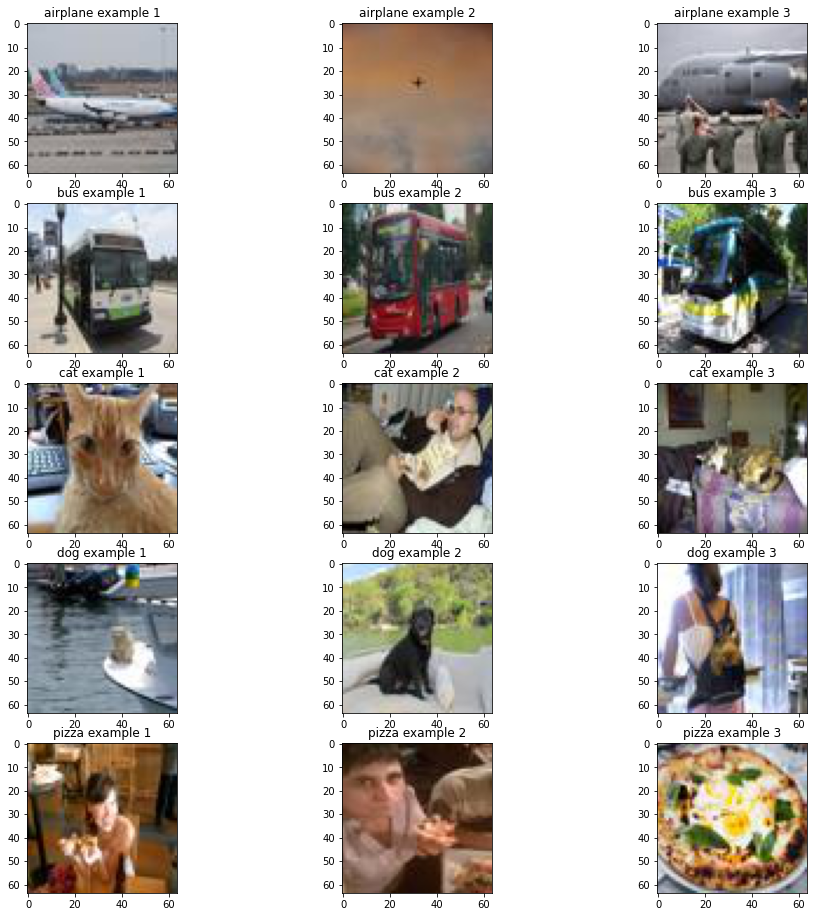

In [51]:
### Plot images from each category ###
catNms=['airplane','bus','cat', 'dog', 'pizza']
fig, ax = plt.subplots(5,3, figsize=(16, 16))
for n in range(0,5):
    temp_dir = os.listdir('train/' + catNms[n])
    #open image
    for i in range(6,9):
        temp_img = Image.open('train/' + catNms[n] + '/' + temp_dir[i]) #get the i-th image from the directory. 
#         Here, we just grab the 0th, 1st, and 2nd.
        #convert to numpy array for plotting
        temp_np_arr = np.array(temp_img)
        ax[n,i-6].imshow(temp_np_arr)
        ax[n,i-6].set_title(catNms[n] + ' example ' + str(i-5) )

plt.savefig('example_training_images.jpg')
        

In [24]:
###Create validation dataset ###
catNms=['airplane','bus','cat', 'dog', 'pizza']
catIds = coco.getCatIds(catNms=catNms); #get a list category ids for each category name 
for n, cat_id in enumerate(catIds): ##for each category id
    print('in category id:,',cat_id)
    imgIds = coco.getImgIds(catIds = cat_id) #for each category id, get a list of img ids
    print(imgIds[:10]) #printing first 10 image ids
    pathlib.Path('val_orig/' + catNms[n]).mkdir(parents=True, exist_ok=True) #create a path to store training data for the current category
    coco.download(tarDir = 'val_orig/' + catNms[n], imgIds = imgIds[1500:2000]) #download first 1500 image ids
#     into the specified directory
    d = os.listdir('val_orig/' + catNms[n]) #create list of files in the created directory. This list has 1500 
#     jpg file names
#     print('list of files in d', d)
    for img in d: #iterate through list of downloaded images. Resize them to 64 x 64. 
        temp_img = Image.open('val/' + catNms[n] + '/' + img) #open image
        temp_img = temp_img.resize((64,64)) #resize
        temp_img.save(fp = 'val/' + catNms[n] + '/' + img) #overwrite image with the 64 x 64 version
        ### save function parameters:
        #fp – A filename (string), pathlib.Path object or file object.
        #format – Optional format override. If omitted, the format to use is determined from the 
        ###filename extension.
        #If a file object was used instead of a filename, this parameter should always be used.


in category id:, 5
[221184, 393221, 376838, 352264, 24585, 253965, 57362, 32787, 540695, 237592]
downloaded 0/500 images (t=0.2s)
downloaded 1/500 images (t=0.3s)
downloaded 2/500 images (t=0.3s)
downloaded 3/500 images (t=0.2s)
downloaded 4/500 images (t=0.2s)
downloaded 5/500 images (t=0.2s)
downloaded 6/500 images (t=0.2s)
downloaded 7/500 images (t=0.2s)
downloaded 8/500 images (t=0.2s)
downloaded 9/500 images (t=0.2s)
downloaded 10/500 images (t=0.2s)
downloaded 11/500 images (t=0.2s)
downloaded 12/500 images (t=0.2s)
downloaded 13/500 images (t=0.2s)
downloaded 14/500 images (t=0.2s)
downloaded 15/500 images (t=0.2s)
downloaded 16/500 images (t=0.3s)
downloaded 17/500 images (t=0.2s)
downloaded 18/500 images (t=0.2s)
downloaded 19/500 images (t=0.2s)
downloaded 20/500 images (t=0.2s)
downloaded 21/500 images (t=0.2s)
downloaded 22/500 images (t=0.2s)
downloaded 23/500 images (t=0.2s)
downloaded 24/500 images (t=0.2s)
downloaded 25/500 images (t=0.2s)
downloaded 26/500 images (t=0

downloaded 235/500 images (t=0.2s)
downloaded 236/500 images (t=0.3s)
downloaded 237/500 images (t=0.2s)
downloaded 238/500 images (t=0.2s)
downloaded 239/500 images (t=0.2s)
downloaded 240/500 images (t=0.2s)
downloaded 241/500 images (t=0.2s)
downloaded 242/500 images (t=0.2s)
downloaded 243/500 images (t=0.4s)
downloaded 244/500 images (t=0.2s)
downloaded 245/500 images (t=0.5s)
downloaded 246/500 images (t=0.2s)
downloaded 247/500 images (t=0.2s)
downloaded 248/500 images (t=0.3s)
downloaded 249/500 images (t=0.2s)
downloaded 250/500 images (t=0.2s)
downloaded 251/500 images (t=0.2s)
downloaded 252/500 images (t=0.3s)
downloaded 253/500 images (t=0.3s)
downloaded 254/500 images (t=0.2s)
downloaded 255/500 images (t=0.2s)
downloaded 256/500 images (t=0.2s)
downloaded 257/500 images (t=0.2s)
downloaded 258/500 images (t=0.2s)
downloaded 259/500 images (t=0.2s)
downloaded 260/500 images (t=0.2s)
downloaded 261/500 images (t=0.2s)
downloaded 262/500 images (t=0.2s)
downloaded 263/500 i

downloaded 471/500 images (t=0.2s)
downloaded 472/500 images (t=0.3s)
downloaded 473/500 images (t=0.2s)
downloaded 474/500 images (t=0.1s)
downloaded 475/500 images (t=0.2s)
downloaded 476/500 images (t=0.2s)
downloaded 477/500 images (t=0.2s)
downloaded 478/500 images (t=0.2s)
downloaded 479/500 images (t=0.2s)
downloaded 480/500 images (t=0.2s)
downloaded 481/500 images (t=0.2s)
downloaded 482/500 images (t=0.2s)
downloaded 483/500 images (t=0.3s)
downloaded 484/500 images (t=0.2s)
downloaded 485/500 images (t=0.2s)
downloaded 486/500 images (t=0.3s)
downloaded 487/500 images (t=0.3s)
downloaded 488/500 images (t=0.2s)
downloaded 489/500 images (t=0.2s)
downloaded 490/500 images (t=0.2s)
downloaded 491/500 images (t=0.2s)
downloaded 492/500 images (t=0.2s)
downloaded 493/500 images (t=0.3s)
downloaded 494/500 images (t=0.2s)
downloaded 495/500 images (t=0.3s)
downloaded 496/500 images (t=0.2s)
downloaded 497/500 images (t=0.2s)
downloaded 498/500 images (t=0.2s)
downloaded 499/500 i

downloaded 206/500 images (t=0.2s)
downloaded 207/500 images (t=0.2s)
downloaded 208/500 images (t=0.3s)
downloaded 209/500 images (t=0.2s)
downloaded 210/500 images (t=0.2s)
downloaded 211/500 images (t=0.2s)
downloaded 212/500 images (t=0.2s)
downloaded 213/500 images (t=0.2s)
downloaded 214/500 images (t=0.3s)
downloaded 215/500 images (t=0.3s)
downloaded 216/500 images (t=0.2s)
downloaded 217/500 images (t=0.2s)
downloaded 218/500 images (t=0.2s)
downloaded 219/500 images (t=0.2s)
downloaded 220/500 images (t=0.3s)
downloaded 221/500 images (t=0.2s)
downloaded 222/500 images (t=0.2s)
downloaded 223/500 images (t=0.3s)
downloaded 224/500 images (t=0.2s)
downloaded 225/500 images (t=0.2s)
downloaded 226/500 images (t=0.2s)
downloaded 227/500 images (t=0.2s)
downloaded 228/500 images (t=0.2s)
downloaded 229/500 images (t=0.2s)
downloaded 230/500 images (t=0.2s)
downloaded 231/500 images (t=0.2s)
downloaded 232/500 images (t=0.2s)
downloaded 233/500 images (t=0.2s)
downloaded 234/500 i

downloaded 441/500 images (t=0.2s)
downloaded 442/500 images (t=0.2s)
downloaded 443/500 images (t=0.3s)
downloaded 444/500 images (t=0.3s)
downloaded 445/500 images (t=0.2s)
downloaded 446/500 images (t=0.2s)
downloaded 447/500 images (t=0.3s)
downloaded 448/500 images (t=0.2s)
downloaded 449/500 images (t=0.2s)
downloaded 450/500 images (t=0.2s)
downloaded 451/500 images (t=0.2s)
downloaded 452/500 images (t=0.2s)
downloaded 453/500 images (t=0.2s)
downloaded 454/500 images (t=0.2s)
downloaded 455/500 images (t=0.2s)
downloaded 456/500 images (t=0.3s)
downloaded 457/500 images (t=0.2s)
downloaded 458/500 images (t=0.2s)
downloaded 459/500 images (t=0.2s)
downloaded 460/500 images (t=0.2s)
downloaded 461/500 images (t=0.2s)
downloaded 462/500 images (t=0.2s)
downloaded 463/500 images (t=0.3s)
downloaded 464/500 images (t=0.2s)
downloaded 465/500 images (t=0.2s)
downloaded 466/500 images (t=0.2s)
downloaded 467/500 images (t=0.2s)
downloaded 468/500 images (t=0.2s)
downloaded 469/500 i

downloaded 176/500 images (t=0.3s)
downloaded 177/500 images (t=0.2s)
downloaded 178/500 images (t=0.2s)
downloaded 179/500 images (t=0.3s)
downloaded 180/500 images (t=0.2s)
downloaded 181/500 images (t=0.2s)
downloaded 182/500 images (t=0.2s)
downloaded 183/500 images (t=0.2s)
downloaded 184/500 images (t=0.2s)
downloaded 185/500 images (t=0.2s)
downloaded 186/500 images (t=0.2s)
downloaded 187/500 images (t=0.2s)
downloaded 188/500 images (t=0.2s)
downloaded 189/500 images (t=0.3s)
downloaded 190/500 images (t=0.2s)
downloaded 191/500 images (t=0.2s)
downloaded 192/500 images (t=0.2s)
downloaded 193/500 images (t=0.2s)
downloaded 194/500 images (t=0.2s)
downloaded 195/500 images (t=0.2s)
downloaded 196/500 images (t=0.2s)
downloaded 197/500 images (t=0.3s)
downloaded 198/500 images (t=0.2s)
downloaded 199/500 images (t=0.2s)
downloaded 200/500 images (t=0.2s)
downloaded 201/500 images (t=0.3s)
downloaded 202/500 images (t=0.2s)
downloaded 203/500 images (t=0.2s)
downloaded 204/500 i

downloaded 411/500 images (t=0.2s)
downloaded 412/500 images (t=0.2s)
downloaded 413/500 images (t=0.2s)
downloaded 414/500 images (t=0.2s)
downloaded 415/500 images (t=0.2s)
downloaded 416/500 images (t=0.2s)
downloaded 417/500 images (t=0.3s)
downloaded 418/500 images (t=0.1s)
downloaded 419/500 images (t=0.2s)
downloaded 420/500 images (t=0.2s)
downloaded 421/500 images (t=0.2s)
downloaded 422/500 images (t=0.2s)
downloaded 423/500 images (t=0.3s)
downloaded 424/500 images (t=0.2s)
downloaded 425/500 images (t=0.2s)
downloaded 426/500 images (t=0.2s)
downloaded 427/500 images (t=0.3s)
downloaded 428/500 images (t=0.3s)
downloaded 429/500 images (t=0.2s)
downloaded 430/500 images (t=0.3s)
downloaded 431/500 images (t=0.2s)
downloaded 432/500 images (t=0.2s)
downloaded 433/500 images (t=0.2s)
downloaded 434/500 images (t=0.2s)
downloaded 435/500 images (t=0.2s)
downloaded 436/500 images (t=0.2s)
downloaded 437/500 images (t=0.2s)
downloaded 438/500 images (t=0.2s)
downloaded 439/500 i

downloaded 146/500 images (t=0.2s)
downloaded 147/500 images (t=0.2s)
downloaded 148/500 images (t=0.2s)
downloaded 149/500 images (t=0.2s)
downloaded 150/500 images (t=0.2s)
downloaded 151/500 images (t=0.2s)
downloaded 152/500 images (t=0.2s)
downloaded 153/500 images (t=0.3s)
downloaded 154/500 images (t=0.2s)
downloaded 155/500 images (t=0.2s)
downloaded 156/500 images (t=0.2s)
downloaded 157/500 images (t=0.2s)
downloaded 158/500 images (t=0.2s)
downloaded 159/500 images (t=0.2s)
downloaded 160/500 images (t=0.3s)
downloaded 161/500 images (t=0.2s)
downloaded 162/500 images (t=0.2s)
downloaded 163/500 images (t=0.2s)
downloaded 164/500 images (t=0.2s)
downloaded 165/500 images (t=0.2s)
downloaded 166/500 images (t=0.2s)
downloaded 167/500 images (t=0.2s)
downloaded 168/500 images (t=0.2s)
downloaded 169/500 images (t=0.2s)
downloaded 170/500 images (t=0.3s)
downloaded 171/500 images (t=0.1s)
downloaded 172/500 images (t=0.2s)
downloaded 173/500 images (t=0.2s)
downloaded 174/500 i

downloaded 381/500 images (t=0.2s)
downloaded 382/500 images (t=0.2s)
downloaded 383/500 images (t=0.2s)
downloaded 384/500 images (t=0.2s)
downloaded 385/500 images (t=0.2s)
downloaded 386/500 images (t=0.2s)
downloaded 387/500 images (t=0.3s)
downloaded 388/500 images (t=0.2s)
downloaded 389/500 images (t=0.2s)
downloaded 390/500 images (t=0.3s)
downloaded 391/500 images (t=0.2s)
downloaded 392/500 images (t=0.3s)
downloaded 393/500 images (t=0.2s)
downloaded 394/500 images (t=0.2s)
downloaded 395/500 images (t=0.2s)
downloaded 396/500 images (t=0.2s)
downloaded 397/500 images (t=0.3s)
downloaded 398/500 images (t=0.2s)
downloaded 399/500 images (t=0.2s)
downloaded 400/500 images (t=0.2s)
downloaded 401/500 images (t=0.2s)
downloaded 402/500 images (t=0.4s)
downloaded 403/500 images (t=0.2s)
downloaded 404/500 images (t=0.3s)
downloaded 405/500 images (t=0.2s)
downloaded 406/500 images (t=0.2s)
downloaded 407/500 images (t=0.2s)
downloaded 408/500 images (t=0.2s)
downloaded 409/500 i

downloaded 116/500 images (t=0.2s)
downloaded 117/500 images (t=0.2s)
downloaded 118/500 images (t=0.3s)
downloaded 119/500 images (t=0.2s)
downloaded 120/500 images (t=0.2s)
downloaded 121/500 images (t=0.2s)
downloaded 122/500 images (t=0.3s)
downloaded 123/500 images (t=0.2s)
downloaded 124/500 images (t=0.2s)
downloaded 125/500 images (t=0.2s)
downloaded 126/500 images (t=0.3s)
downloaded 127/500 images (t=0.3s)
downloaded 128/500 images (t=0.2s)
downloaded 129/500 images (t=0.3s)
downloaded 130/500 images (t=0.2s)
downloaded 131/500 images (t=0.2s)
downloaded 132/500 images (t=0.2s)
downloaded 133/500 images (t=0.2s)
downloaded 134/500 images (t=0.3s)
downloaded 135/500 images (t=0.2s)
downloaded 136/500 images (t=0.2s)
downloaded 137/500 images (t=0.2s)
downloaded 138/500 images (t=0.2s)
downloaded 139/500 images (t=0.2s)
downloaded 140/500 images (t=0.2s)
downloaded 141/500 images (t=0.2s)
downloaded 142/500 images (t=0.3s)
downloaded 143/500 images (t=0.2s)
downloaded 144/500 i

downloaded 351/500 images (t=0.2s)
downloaded 352/500 images (t=0.3s)
downloaded 353/500 images (t=0.2s)
downloaded 354/500 images (t=0.3s)
downloaded 355/500 images (t=0.2s)
downloaded 356/500 images (t=0.2s)
downloaded 357/500 images (t=0.2s)
downloaded 358/500 images (t=0.2s)
downloaded 359/500 images (t=0.2s)
downloaded 360/500 images (t=0.2s)
downloaded 361/500 images (t=0.3s)
downloaded 362/500 images (t=0.2s)
downloaded 363/500 images (t=0.3s)
downloaded 364/500 images (t=0.3s)
downloaded 365/500 images (t=0.3s)
downloaded 366/500 images (t=0.2s)
downloaded 367/500 images (t=0.3s)
downloaded 368/500 images (t=0.2s)
downloaded 369/500 images (t=0.2s)
downloaded 370/500 images (t=0.2s)
downloaded 371/500 images (t=0.2s)
downloaded 372/500 images (t=0.2s)
downloaded 373/500 images (t=0.3s)
downloaded 374/500 images (t=0.2s)
downloaded 375/500 images (t=0.2s)
downloaded 376/500 images (t=0.2s)
downloaded 377/500 images (t=0.2s)
downloaded 378/500 images (t=0.2s)
downloaded 379/500 i

In [69]:
### Create data_loader ### 
root_train = 'train/'
root_val = 'val/'
catNms=['airplane','bus','cat', 'dog', 'pizza']

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, root, catNms):
        super(MyDataset).__init__()
        self.root = {} #dictionary for main directory which holds all the images of a category
        self.filenames = {} #dictionary for filenames of a given category
        for cat in catNms:
            self.root[cat] = root + cat + '/'
        for cat in catNms:
        #create list of image files in each category that can be opened by __getitem__
            self.filenames[cat] = os.listdir(self.root[cat])
        
        self.rand_max = len(os.listdir(self.root[catNms[0]])) - 1 #number of files in directory

        self.mapping = {0 : 'airplane',
                        1: 'bus',
                        2: 'cat',
                        3: 'dog',
                        4: 'pizza'} #makes it easy to convert between index and name of a category.
        
        self.one_hot_encoding = {0: torch.tensor(np.array([1, 0, 0, 0, 0])),
                                1: torch.tensor(np.array([0, 1, 0, 0, 0])),
                                2: torch.tensor(np.array([0, 0, 1, 0, 0])),
                                3: torch.tensor(np.array([0, 0, 0, 1, 0])),
                                4: torch.tensor(np.array([0, 0, 0, 0, 1]))} #one hot encode each category. 

        
        self.to_Tensor_and_Norm = tvt.Compose([tvt.ToTensor(),tvt.Resize((64,64)) , 
                                        tvt.Normalize([0], [1]) ,  tvt.ColorJitter(0.75, 0.75) , 
                                        tvt.RandomHorizontalFlip( p = 0.75), 
                                        tvt.RandomRotation(degrees = 45)]) #normalize and resize in case the resize op 
#         wasn't done. Note that resizing here may not have any impact as the resizing was done previously.  


    def __len__(self):
        count = 0
        for cat in catNms:
            temp_num = os.listdir(self.root[cat])
            count = count + len(temp_num)
        return count #return count. Will be 2500 if the root=val/ and 7500 if root=train/

    def __getitem__(self, index):
        file_index = index % self.rand_max + 1
        class_index = index % 5
 
        img_file = self.filenames[self.mapping[class_index]]
        
        try:
            item = Image.open(self.root[self.mapping[class_index]] + img_file[file_index])
        except IndexError: #for debugging
            print('these are the indices for the line above when shape is correct', class_index , file_index)
            
        np_img = np.array(item)
        shape = np_img.shape
        while shape != (64, 64 ,3): #handle if the image from COCO is grayscale. 
            #print('found a grayscale image, fetching an RGB!')
            another_rand = random.randint(0,self.rand_max)  #generate another rand num
            #print('another_rand is', another_rand)
            try:
                item = Image.open(self.root[self.mapping[class_index]] + img_file[another_rand])
            except IndexError: #for debugging
                print('these are the indices for the line above when shape is incorrect', another_rand , class_index)            
            np_img = np.array(item)
            shape = np_img.shape

        img = self.to_Tensor_and_Norm(item)
        class_label = self.one_hot_encoding[class_index].type(torch.FloatTensor) #convert to Float 
        return img, class_label


my_train_dataset = MyDataset(root_train, catNms)
print(len(my_train_dataset))
index = 3
print(my_train_dataset[index][0].shape, my_train_dataset[index][1])
my_val_dataset = MyDataset(root_val, catNms)
print(len(my_val_dataset))
print(my_val_dataset[index][0].shape, my_val_dataset[index][1])

7500
torch.Size([3, 64, 64]) tensor([0., 0., 0., 1., 0.])
2500
torch.Size([3, 64, 64]) tensor([0., 0., 0., 1., 0.])


In [70]:
# Use MyDataset class in PyTorches DataLoader functionality
my_train_dataloader = torch.utils.data.DataLoader(my_train_dataset, batch_size=12, num_workers = 4, drop_last=False)
my_val_dataloader = torch.utils.data.DataLoader(my_val_dataset, batch_size = 12, num_workers = 4, drop_last = False)
for n, batch in enumerate(my_train_dataloader):
#     #Note: each batch is a list of length 2. The first is a pytorch tensor B x C x H x W and the 
#     #second is a pytorch tensor of length B with the associated class labels of each image in the 
#     #first item of the list!
    print('batch is', n)


batch is 0
batch is 1
batch is 2
batch is 3
batch is 4
batch is 5
batch is 6
batch is 7
batch is 8
batch is 9
batch is 10
batch is 11
batch is 12
batch is 13
batch is 14
batch is 15
batch is 16
batch is 17
batch is 18
batch is 19
batch is 20
batch is 21
batch is 22
batch is 23
batch is 24
batch is 25
batch is 26
batch is 27
batch is 28
batch is 29
batch is 30
batch is 31
batch is 32
batch is 33
batch is 34
batch is 35
batch is 36
batch is 37
batch is 38
batch is 39
batch is 40
batch is 41
batch is 42
batch is 43
batch is 44
batch is 45
batch is 46
batch is 47
batch is 48
batch is 49
batch is 50
batch is 51
batch is 52
batch is 53
batch is 54
batch is 55
batch is 56
batch is 57
batch is 58
batch is 59
batch is 60
batch is 61
batch is 62
batch is 63
batch is 64
batch is 65
batch is 66
batch is 67
batch is 68
batch is 69
batch is 70
batch is 71
batch is 72
batch is 73
batch is 74
batch is 75
batch is 76
batch is 77
batch is 78
batch is 79
batch is 80
batch is 81
batch is 82
batch is 83
ba

In [95]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
inp = torch.randn(3, 5, requires_grad=True)
print(inp)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(inp, target)
output.backward()
print(target)

In [71]:
###Create CNN ####
### Use valid mode - i.e, no padding

class HW4Net(nn.Module):
    def __init__(self):
        super(HW4Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(6272,64)
        self.fc2 = nn.Linear(64, 5)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [72]:
net1 = HW4Net()
loss_running_list_net1 = []
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net1.parameters(), lr = 1e-3, betas = (0.9, 0.99))
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(my_train_dataloader):
        inputs, labels = data
        optimizer.zero_grad() #Sets gradients of all model parameters to zero. We want to compute fresh gradients
        #based on the new forward run. 
        outputs = net1(inputs)
        loss = criterion(outputs, labels) #compute cross-entropy loss
        loss.backward() #compute derivative of loss wrt each gradient. 
        optimizer.step() #takes a step on hyperplane based on derivatives
        running_loss += loss.item() 
        if (i+1) % 100 == 0:
            print("[epoch: %d, batch: %5d] loss: %3f" % (epoch + 1, i + 1, running_loss / 100))
            loss_running_list_net1.append(running_loss/100)
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for n, data in enumerate(my_val_dataloader):
            images, labels = data
            outputs = net1(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0) #add to total's total
            for n, i in enumerate(labels):
                temp = np.array(i) #temp holds the one hot encoded label
                idx = np.argmax(temp) #get the argmax of the encoded label - will be a value between 0 and 4.
                #print(idx)
                if idx == predicted[n]: #if the predicted value and label match
                    correct = correct + 1 #add to correct total

    print('Accuracy of the network on the val images: %d %%' % (
        100 * correct / total))
            

[epoch: 1, batch:   100] loss: 1.449099
[epoch: 1, batch:   200] loss: 1.342487
[epoch: 1, batch:   300] loss: 1.325175
[epoch: 1, batch:   400] loss: 1.299197
[epoch: 1, batch:   500] loss: 1.247632
[epoch: 1, batch:   600] loss: 1.263428
Accuracy of the network on the val images: 50 %
[epoch: 2, batch:   100] loss: 1.241377
[epoch: 2, batch:   200] loss: 1.274841
[epoch: 2, batch:   300] loss: 1.256779
[epoch: 2, batch:   400] loss: 1.208291
[epoch: 2, batch:   500] loss: 1.191183
[epoch: 2, batch:   600] loss: 1.210946
Accuracy of the network on the val images: 51 %
[epoch: 3, batch:   100] loss: 1.212663
[epoch: 3, batch:   200] loss: 1.198797
[epoch: 3, batch:   300] loss: 1.224549
[epoch: 3, batch:   400] loss: 1.171130
[epoch: 3, batch:   500] loss: 1.161865
[epoch: 3, batch:   600] loss: 1.178264
Accuracy of the network on the val images: 53 %
[epoch: 4, batch:   100] loss: 1.184225
[epoch: 4, batch:   200] loss: 1.160716
[epoch: 4, batch:   300] loss: 1.176263
[epoch: 4, batch

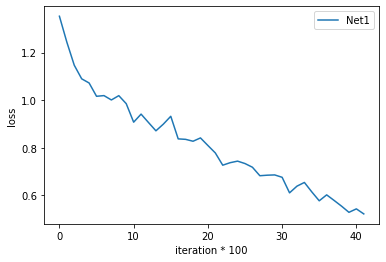

Accuracy of the network on the val images: 56 %


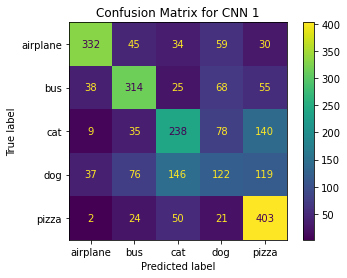

<Figure size 432x288 with 0 Axes>

In [73]:
### Test performance of CNN 1 on val data ###
correct = 0
total = 0
y_pred = []
y_label = []
mapping = { 0: 'airplane',
            1: 'bus',
            2: 'cat',
            3: 'dog',
            4: 'pizza'}


with torch.no_grad():
    for n, data in enumerate(my_val_dataloader):
        images, labels = data

        outputs = net1(images)

        _, predicted = torch.max(outputs.data, 1) 

        total += labels.size(0) #add to total count of ground truth images so we can calculate total accuracy
        #print("total images in val set", total)
        for n, i in enumerate(labels):
            temp = np.array(i) #arrays are one hot encoded, we need to convert it into a human readable label for
            #display in the confusion matrix
            label_arg = np.argmax(temp) #get the argument of the one hot encoding
            y_label.append(mapping[label_arg]) #apply the argument to the mapping dictionary above. For example
            # if the argument is 3, then, that corresponds to a label of dog in the mapping dictionary
            t = int(np.array(predicted[n])) #get integer representation of prediction from network (will 
            #be an int from 0 to 4. 
            y_pred.append(mapping[t]) #append the predicted output of this label to the prediction list, but, 
            #via the mapping dictionary definition so that the y_pred list is human readable. 

            if label_arg == predicted[n]:
                correct = correct + 1 #add to total count of correct predictions so we can calculate total accuracy
            

print('Accuracy of the network on the val images: %d %%' % (
    100 * correct / total))
from sklearn.metrics import confusion_matrix

y_true = y_label
y_pred = y_pred
confusion_matrix=confusion_matrix(y_true, y_pred, labels = [ "airplane", "bus", "cat", "dog", "pizza"])
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels = [ "airplane", "bus", "cat", "dog", "pizza"])
disp.plot()
disp.ax_.set_title("Confusion Matrix for CNN 1")
plt.show()
plt.savefig('CM_CNN1')


In [74]:
### Create Net 2 ###
class HW4Net2(nn.Module):
    def __init__(self):
        super(HW4Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(8192,64)
        self.fc2 = nn.Linear(64, 5)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [75]:
### RUN TRAINING FOR NET 2 - THE NETWORK WITH PADDING ###
net2 = HW4Net2()
loss_running_list_net2 = []
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net2.parameters(), lr = 1e-3, betas = (0.9, 0.99))
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(my_train_dataloader):
        inputs, labels = data
        optimizer.zero_grad() #Sets gradients of all model parameters to zero. We want to compute fresh gradients
        #based on the new forward run. 
        outputs = net2(inputs)
        loss = criterion(outputs, labels) #compute cross-entropy loss
        loss.backward() #compute derivative of loss wrt each gradient. 
        optimizer.step() #takes a step on hyperplane based on derivatives
        running_loss += loss.item() 
        if (i+1) % 100 == 0:
            print("[epoch: %d, batch: %5d] loss: %3f" % (epoch + 1, i + 1, running_loss / 100))
            loss_running_list_net2.append(running_loss/100)
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for n, data in enumerate(my_val_dataloader):
            images, labels = data
            outputs = net2(images)


            _, predicted = torch.max(outputs.data, 1)
            if n < 1:
                print("this is _", _)
                print("this is predicted", predicted)
#             #print("outputs.data:", outputs.data)
#             if n < 1:
#                 #print(_)
#                 print("predicted", predicted)
            total += labels.size(0)
            #print("total images in val set", total)
            for n, i in enumerate(labels):
                #print(i)
                temp = np.array(i)
                #print(predicted[n])
                idx = np.argmax(temp)
                #print(idx)
                if idx == predicted[n]:
                    correct = correct + 1
                    #print('something is correct!!!')
            #correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the val images: %d %%' % (
        100 * correct / total))

[epoch: 1, batch:   100] loss: 1.459244
[epoch: 1, batch:   200] loss: 1.337524
[epoch: 1, batch:   300] loss: 1.336069
[epoch: 1, batch:   400] loss: 1.269078
[epoch: 1, batch:   500] loss: 1.260838
[epoch: 1, batch:   600] loss: 1.253010
this is _ tensor([3.6998, 1.8569, 1.7502, 2.0917, 2.0521, 2.0070, 1.0192, 1.2593, 0.9846,
        2.8599, 1.9120, 1.7266])
this is predicted tensor([0, 1, 4, 2, 4, 0, 1, 1, 3, 4, 0, 1])
Accuracy of the network on the val images: 48 %
[epoch: 2, batch:   100] loss: 1.234870
[epoch: 2, batch:   200] loss: 1.245541
[epoch: 2, batch:   300] loss: 1.260836
[epoch: 2, batch:   400] loss: 1.212363
[epoch: 2, batch:   500] loss: 1.172507
[epoch: 2, batch:   600] loss: 1.219196
this is _ tensor([2.7095, 1.1279, 0.9769, 1.1868, 2.3913, 3.4601, 1.2998, 1.0270, 1.3464,
        0.8141, 2.8499, 1.3896])
this is predicted tensor([0, 1, 2, 2, 4, 0, 1, 3, 3, 4, 0, 1])
Accuracy of the network on the val images: 51 %
[epoch: 3, batch:   100] loss: 1.181064
[epoch: 3, b

Accuracy of the network on the val images: 58 %


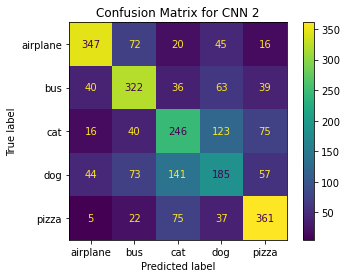

<Figure size 432x288 with 0 Axes>

In [76]:
### RUN VAL WITH TORCH.NO_GRAD FOR NET 2 - THE NETWORK WITH PADDING ###
### GENERATE CONFUSION MATRIX ####

correct = 0
total = 0
y_pred = []
y_label = []
mapping = { 0: 'airplane',
            1: 'bus',
            2: 'cat',
            3: 'dog',
            4: 'pizza'}


with torch.no_grad():
    for n, data in enumerate(my_val_dataloader):
        images, labels = data

        outputs = net2(images)

        _, predicted = torch.max(outputs.data, 1) 

        total += labels.size(0) #add to total count of ground truth images so we can calculate total accuracy
        #print("total images in val set", total)
        for n, i in enumerate(labels):
            temp = np.array(i) #arrays are one hot encoded, we need to convert it into a human readable label for
            #display in the confusion matrix
            label_arg = np.argmax(temp) #get the argument of the one hot encoding
            y_label.append(mapping[label_arg]) #apply the argument to the mapping dictionary above. For example
            # if the argument is 3, then, that corresponds to a label of dog in the mapping dictionary
            t = int(np.array(predicted[n])) #get integer representation of prediction from network (will 
            #be an int from 0 to 4. 
            y_pred.append(mapping[t]) #append the predicted output of this label to the prediction list, but, 
            #via the mapping dictionary definition so that the y_pred list is human readable. 

            if label_arg == predicted[n]:
                correct = correct + 1 #add to total count of correct predictions so we can calculate total accuracy
            

print('Accuracy of the network on the val images: %d %%' % (
    100 * correct / total))
from sklearn.metrics import confusion_matrix

y_true = y_label
y_pred = y_pred
confusion_matrix=confusion_matrix(y_true, y_pred, labels = [ "airplane", "bus", "cat", "dog", "pizza"])
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels = [ "airplane", "bus", "cat", "dog", "pizza"])
disp.plot()
disp.ax_.set_title("Confusion Matrix for CNN 2")
plt.show()
plt.savefig('CM_CNN2')

In [77]:
### CNN TASK 3 ###
### CREATE 10 CONV LAYERS BETWEEN CONV LAYERS IN NET1/2 ###
### 32 IN, 32 OUT, KER 3, PAD 1 ###
### FORWARD SHOULD HAVE AN ACTIVATION FUNCTION BEFORE GOING TO NEXT LAYER ###
### Create Net 3 ###
class HW4Net3(nn.Module):
    def __init__(self):
        super(HW4Net3, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.conv3 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv5 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv6 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv7 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv8 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv9 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv10 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv11 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv12 = nn.Conv2d(32, 32, 3, padding=1)
        
        self.fc1 = nn.Linear(2048,64)
        self.fc2 = nn.Linear(64, 5)
    
    def forward(self, x): #we are passing in a torch.float32 into the network with a shape 12, 3, 64, 64
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))
        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x = F.relu(self.conv10(x))
        x = F.relu(self.conv11(x))
        x = F.relu(self.conv12(x))              
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [78]:
net3 = HW4Net3()
loss_running_list_net3 = []
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net3.parameters(), lr = 1e-3, betas = (0.9, 0.99))
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(my_train_dataloader):
        inputs, labels = data
        optimizer.zero_grad() #Sets gradients of all model parameters to zero. We want to compute fresh gradients
        #based on the new forward run. 
        outputs = net3(inputs)
        loss = criterion(outputs, labels) #compute cross-entropy loss
        loss.backward() #compute derivative of loss wrt each gradient. 
        optimizer.step() #takes a step on hyperplane based on derivatives
        running_loss += loss.item() 
        if (i+1) % 100 == 0:
            print("[epoch: %d, batch: %5d] loss: %3f" % (epoch + 1, i + 1, running_loss / 100))
            loss_running_list_net3.append(running_loss/100)
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for n, data in enumerate(my_val_dataloader):
            images, labels = data
            outputs = net3(images)


            _, predicted = torch.max(outputs.data, 1)
            if n < 1:
                print("this is _", _)
                print("this is predicted", predicted)
#             #print("outputs.data:", outputs.data)
#             if n < 1:
#                 #print(_)
#                 print("predicted", predicted)
            total += labels.size(0)
            #print("total images in val set", total)
            for n, i in enumerate(labels):
                #print(i)
                temp = np.array(i)
                #print(predicted[n])
                idx = np.argmax(temp)
                #print(idx)
                if idx == predicted[n]:
                    correct = correct + 1
                    #print('something is correct!!!')
            #correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the val images: %d %%' % (
        100 * correct / total))

[epoch: 1, batch:   100] loss: 1.609859
[epoch: 1, batch:   200] loss: 1.602464
[epoch: 1, batch:   300] loss: 1.489630
[epoch: 1, batch:   400] loss: 1.425093
[epoch: 1, batch:   500] loss: 1.373576
[epoch: 1, batch:   600] loss: 1.388967
this is _ tensor([2.1556, 0.7857, 2.0789, 1.6573, 1.4943, 2.0840, 1.3516, 0.8298, 1.6872,
        3.3143, 2.0779, 0.8943])
this is predicted tensor([0, 2, 4, 4, 4, 0, 4, 1, 0, 4, 0, 2])
Accuracy of the network on the val images: 41 %
[epoch: 2, batch:   100] loss: 1.386929
[epoch: 2, batch:   200] loss: 1.356821
[epoch: 2, batch:   300] loss: 1.384247
[epoch: 2, batch:   400] loss: 1.342195
[epoch: 2, batch:   500] loss: 1.286354
[epoch: 2, batch:   600] loss: 1.299715
this is _ tensor([1.0058, 1.0464, 1.3315, 0.9995, 1.5104, 1.7462, 0.5675, 0.7951, 1.3066,
        1.0120, 1.8961, 1.0205])
this is predicted tensor([0, 1, 4, 2, 4, 0, 4, 2, 0, 4, 0, 1])
Accuracy of the network on the val images: 44 %
[epoch: 3, batch:   100] loss: 1.324926
[epoch: 3, b

Accuracy of the network on the val images: 53 %


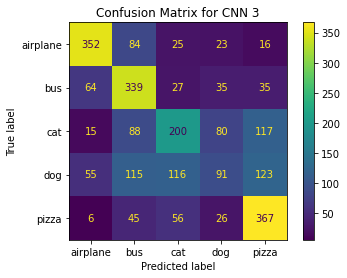

<Figure size 432x288 with 0 Axes>

In [79]:
### RUN VAL WITH TORCH.NO_GRAD FOR NET 3 - THE NETWORK WITH PADDING AND MORE LAYERS ###
### GENERATE CONFUSION MATRIX ####

correct = 0
total = 0
y_pred = []
y_label = []
mapping = { 0: 'airplane',
            1: 'bus',
            2: 'cat',
            3: 'dog',
            4: 'pizza'}


with torch.no_grad():
    for n, data in enumerate(my_val_dataloader):
        images, labels = data

        outputs = net3(images)

        _, predicted = torch.max(outputs.data, 1) 

        total += labels.size(0) #add to total count of ground truth images so we can calculate total accuracy
        #print("total images in val set", total)
        for n, i in enumerate(labels):
            temp = np.array(i) #arrays are one hot encoded, we need to convert it into a human readable label for
            #display in the confusion matrix
            label_arg = np.argmax(temp) #get the argument of the one hot encoding
            y_label.append(mapping[label_arg]) #apply the argument to the mapping dictionary above. For example
            # if the argument is 3, then, that corresponds to a label of dog in the mapping dictionary
            t = int(np.array(predicted[n])) #get integer representation of prediction from network (will 
            #be an int from 0 to 4. 
            y_pred.append(mapping[t]) #append the predicted output of this label to the prediction list, but, 
            #via the mapping dictionary definition so that the y_pred list is human readable. 

            if label_arg == predicted[n]:
                correct = correct + 1 #add to total count of correct predictions so we can calculate total accuracy
            

print('Accuracy of the network on the val images: %d %%' % (
    100 * correct / total))
from sklearn.metrics import confusion_matrix

y_true = y_label
y_pred = y_pred
confusion_matrix=confusion_matrix(y_true, y_pred, labels = [ "airplane", "bus", "cat", "dog", "pizza"])
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels = [ "airplane", "bus", "cat", "dog", "pizza"])
disp.plot()
disp.ax_.set_title("Confusion Matrix for CNN 3")
plt.show()
plt.savefig('CM_CNN3')

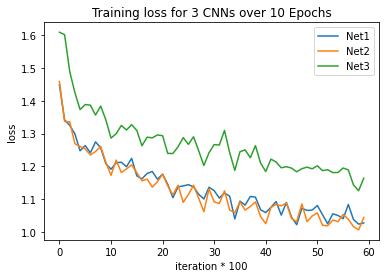

In [80]:
### Plot training loss for CNN1 and CNN2 ###
    
plt.plot(loss_running_list_net1, label = 'Net1')
plt.plot(loss_running_list_net2, label = 'Net2')
plt.plot(loss_running_list_net3, label = 'Net3')
plt.xlabel('iteration * 100')
plt.ylabel('loss')
plt.title('Training loss for 3 CNNs over 10 Epochs')
plt.legend()
plt.savefig('Training_loss.jpg')
